In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import random

In [60]:
TRAIN_DIR = os.path.join('C:\CVPR\CIFAR-10-images-master', 'train')

In [61]:
CATEGORIES = []

for i in os.listdir(TRAIN_DIR):
    CATEGORIES.append(i)

print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [62]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append({'image': img_arr, 'class': class_num})
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:01<00:00, 4551.69it/s]

50000


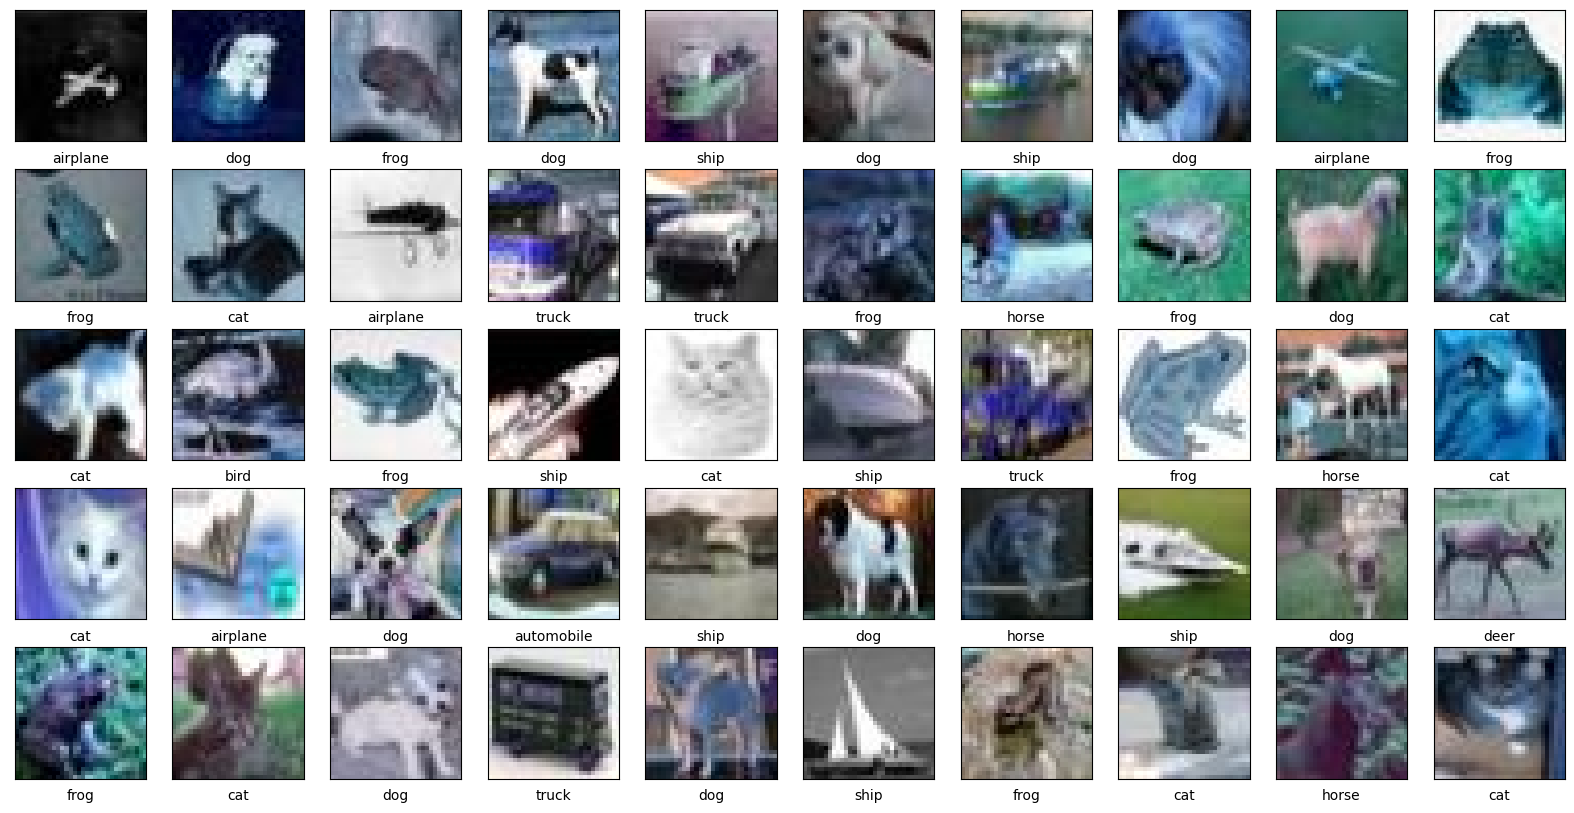

In [63]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i]['image'])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i]['class']])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()


In [64]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [65]:
class KNN:
    k = None

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def accuracy(self, y_actual, y_pred):
        return np.sum(y_actual == y_pred) / len(y_actual)
    
    def predict(self, X_test, l_func = "l2"):
        y_predtion = [] 
        i = 0
        for x in tqdm(X_test):
            distances = []
            for i in range(len(self.X)):
                if l_func == "l2":
                    distance = np.sqrt(np.sum((x - self.X[i])**2))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
                elif l_func == "l1":
                    distance = np.sum(np.abs(x - self.X[i]))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
            distances.sort(key=lambda x: x['distance'])
            k_nearest = distances[:self.k]
            k_nearest_classes = [x['class'] for x in k_nearest]
            y_predtion.append(max(set(k_nearest_classes), key=k_nearest_classes.count))
        return y_predtion

In [66]:
def split(X, y, test_size=0.2):
    X_train = X[:int(len(X)*(1-test_size))]
    X_test = X[int(len(X)*(1-test_size)):]
    y_train = y[:int(len(y)*(1-test_size))]
    y_test = y[int(len(y)*(1-test_size)):]
    return X_train, X_test, y_train, y_test

X = np.array([i['image'] for i in TRAIN_DATA[:10]])
y = np.array([i['class'] for i in TRAIN_DATA[:10]])

l1_acc = {}
l2_acc = {}

k_neighbors = np.arange(1, 20)

for k in tqdm(k_neighbors):
    knn = KNN(k)
    
    X_train , X_test, y_train, y_test = split(X, y, test_size=0.2)

    knn.fit(X_train, y_train)

    y_pred_l1 = knn.predict(X_test, l_func="l1")
    y_pred_l2 = knn.predict(X_test, l_func="l2")

   
    l1_acc[k] = knn.accuracy(y_test, y_pred_l1)
    l2_acc[k] = knn.accuracy(y_test, y_pred_l2)

    print(f"When k = {k} accuracy of l1 is {l1_acc[k]} and accuracy of l2 is {l2_acc[k]}")

100%|██████████| 2/2 [00:00<00:00, 159.19it/s]

100%|██████████| 2/2 [00:00<00:00, 500.51it/s]


When k = 1 accuracy of l1 is 0.5 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<00:00, 999.36it/s]

100%|██████████| 2/2 [00:00<00:00, 335.65it/s]


When k = 2 accuracy of l1 is 0.5 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<00:00, 2002.05it/s]

100%|██████████| 2/2 [00:00<00:00, 1189.70it/s]


When k = 3 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<00:00, 1000.43it/s]

 21%|██        | 4/19 [00:00<00:00, 36.93it/s]

When k = 4 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<00:00, 1517.48it/s]

100%|██████████| 2/2 [00:00<00:00, 199.98it/s]


When k = 5 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 200.00it/s]


When k = 6 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]


When k = 7 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<00:00, 200.00it/s]

 42%|████▏     | 8/19 [00:00<00:00, 37.79it/s]

When k = 8 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 267.76it/s]


When k = 9 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<00:00, 312.86it/s]

100%|██████████| 2/2 [00:00<00:00, 200.01it/s]


When k = 10 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 311.88it/s]


When k = 11 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]


When k = 12 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<?, ?it/s]

 68%|██████▊   | 13/19 [00:00<00:00, 39.07it/s]

When k = 13 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]


When k = 14 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<00:00, 200.00it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]


When k = 15 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]


When k = 16 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<00:00, 309.12it/s]

 89%|████████▉ | 17/19 [00:00<00:00, 38.04it/s]

When k = 17 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<00:00, 172.03it/s]

100%|██████████| 2/2 [00:00<00:00, 883.38it/s]


When k = 18 accuracy of l1 is 0.0 and accuracy of l2 is 0.0



100%|██████████| 2/2 [00:00<00:00, 2268.42it/s]

100%|██████████| 19/19 [00:00<00:00, 37.77it/s]

When k = 19 accuracy of l1 is 0.0 and accuracy of l2 is 0.0


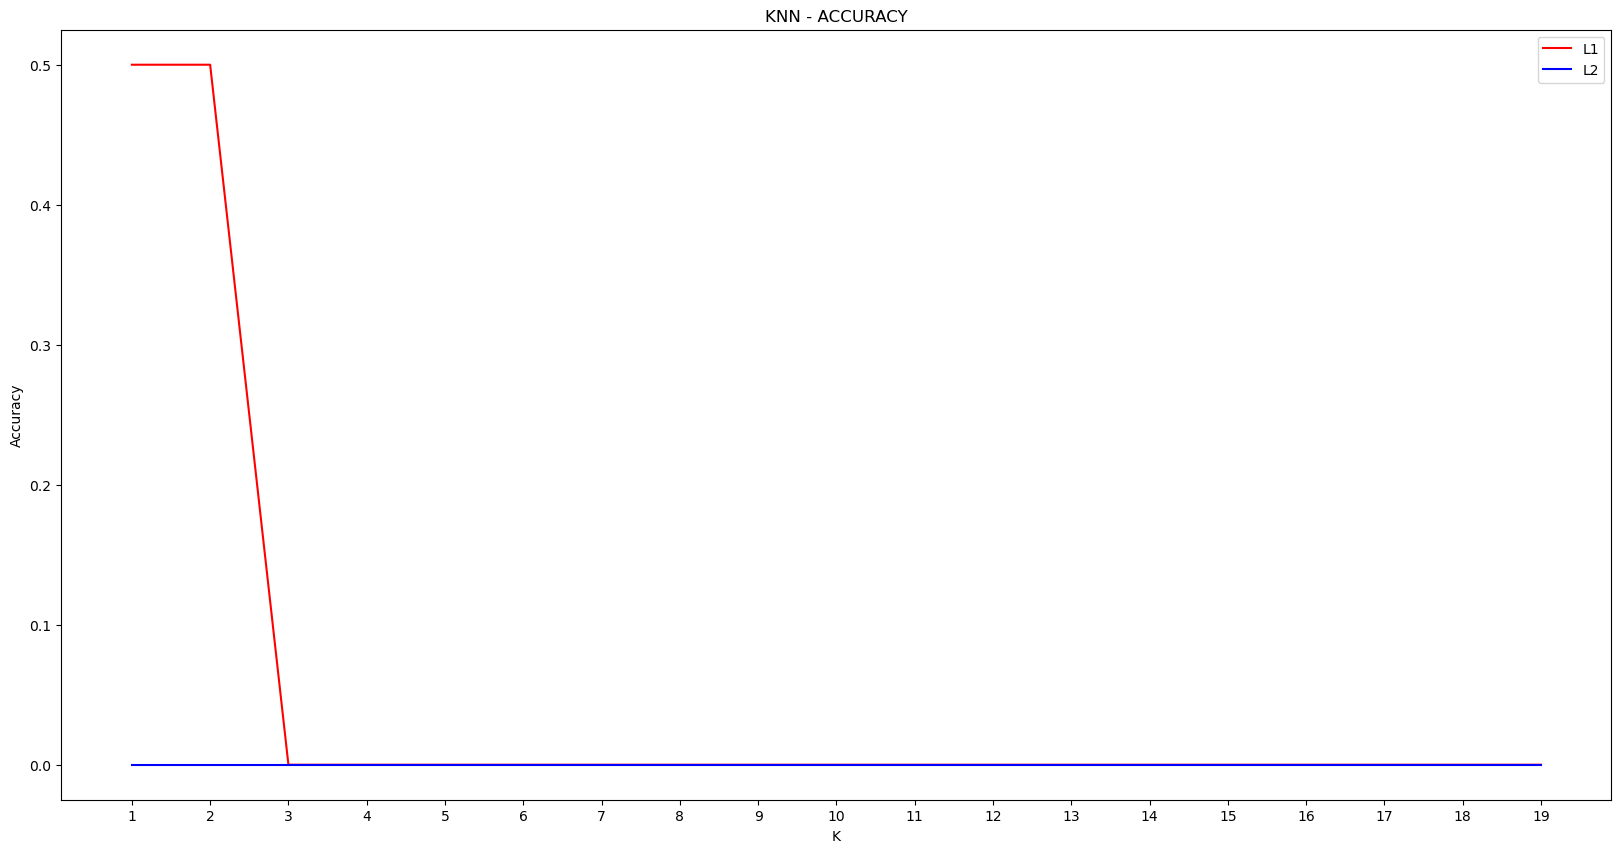

In [67]:
plt.figure(figsize=(20,10))
plt.title("KNN - ACCURACY")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(k_neighbors, list(l1_acc.values()), label="L1", color="red")
plt.plot(k_neighbors, list(l2_acc.values()), label="L2", color="blue")
plt.xticks(k_neighbors)
plt.legend(["L1", "L2"])
plt.show()